## Predictive Modeling on Hospital Readmission :

### Inport the data from all the relevant csv files to the pandas dataframe

In [1]:
import pandas as pd

In [2]:
admissions  = pd.read_csv('ADMISSIONS.csv')
admissions.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [3]:
patients  = pd.read_csv('PATIENTS.csv')
patients.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [4]:
diagnosis = pd.read_csv('DIAGNOSES_ICD.csv')
diagnosis.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [6]:
proc = pd.read_csv('PROCEDURES_ICD.csv')
proc.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,944,62641,154460,3,3404
1,945,2592,130856,1,9671
2,946,2592,130856,2,3893
3,947,55357,119355,1,9672
4,948,55357,119355,2,331


In [8]:
drug = pd.read_csv('DRGCODES.csv')
drug.head()

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY
0,342,2491,144486,HCFA,28,"TRAUMATIC STUPOR & COMA, COMA <1 HR AGE >17 WI...",NaN,NaN
1,343,24958,162910,HCFA,110,MAJOR CARDIOVASCULAR PROCEDURES WITH COMPLICAT...,NaN,NaN
2,344,18325,153751,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN
3,345,17887,182692,HCFA,14,SPECIFIC CEREBROVASCULAR DISORDERS EXCEPT TRAN...,NaN,NaN
4,346,11113,157980,HCFA,390,NEONATE WITH OTHER SIGNIFICANT PROBLEMS,NaN,NaN


In [10]:
cptevents_df = pd.read_csv('CPTEVENTS.csv')
cptevents_df.head()

C:\Users\KOUSHIK\AppData\Local\Temp\ipykernel_10444\1456940291.py:1: DtypeWarning: Columns (4,5,7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  cptevents_df = pd.read_csv('CPTEVENTS.csv')


,ROW_ID,SUBJECT_ID,HADM_ID,COSTCENTER,CHARTDATE,CPT_CD,CPT_NUMBER,CPT_SUFFIX,TICKET_ID_SEQ,SECTIONHEADER,SUBSECTIONHEADER,DESCRIPTION
0,317,11743,129545,ICU,NaN,99232,99232.0,NaN,6.0,Evaluation and management,Hospital inpatient services,NaN
1,318,11743,129545,ICU,NaN,99232,99232.0,NaN,7.0,Evaluation and management,Hospital inpatient services,NaN
2,319,11743,129545,ICU,NaN,99232,99232.0,NaN,8.0,Evaluation and management,Hospital inpatient services,NaN
3,320,11743,129545,ICU,NaN,99232,99232.0,NaN,9.0,Evaluation and management,Hospital inpatient services,NaN
4,321,6185,183725,ICU,NaN,99223,99223.0,NaN,1.0,Evaluation and management,Hospital inpatient services,NaN


In [11]:
icustay_df = pd.read_csv('ICUSTAYS.csv')
icustay_df .head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202


In [14]:
notes_df= pd.read_csv('NOTEEVENTS.csv')
notes_df.head()

C:\Users\KOUSHIK\AppData\Local\Temp\ipykernel_10444\206513996.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  notes_df= pd.read_csv('NOTEEVENTS.csv')


,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


### Remove the unnecessary columns from each dataframe

In [17]:
admissions = admissions.drop(columns=['ROW_ID','ADMISSION_LOCATION','DISCHARGE_LOCATION',
                                                                          'LANGUAGE', 'RELIGION', 'MARITAL_STATUS',
                                                                          'ETHNICITY','EDREGTIME','EDOUTTIME',
                                                                          'DIAGNOSIS','HAS_CHARTEVENTS_DATA',
                                     'DEATHTIME','INSURANCE','HOSPITAL_EXPIRE_FLAG'])

In [18]:
notes_df = notes_df.drop(columns=['CHARTDATE','CHARTTIME', 'STORETIME', 'CGID', 'ISERROR'])
notes_df.count()

ROW_ID         2083180
SUBJECT_ID     2083180
HADM_ID        1851344
CATEGORY       2083180
DESCRIPTION    2083180
TEXT           2083180
dtype: int64

In [19]:
# First, convert the ADMITTIME and DISCHTIME columns to datetime format
admissions['ADMITTIME'] = pd.to_datetime(admissions['ADMITTIME'], errors='coerce')
admissions['DISCHTIME'] = pd.to_datetime(admissions['DISCHTIME'], errors='coerce')

# Calculate the length of stay as the difference between 'DISCHTIME' and 'ADMITTIME'
admissions['LEN_OF_STAY'] = (admissions['DISCHTIME'] - admissions['ADMITTIME']).dt.days
admissions.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,LEN_OF_STAY
0,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,1
1,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,5
2,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,6
3,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,2
4,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,3


## Data Cleanup to remove the patients data where the discharge date is not given or it is lesser than the admit date (may be a data entry issue). We have removed around 100 such records. 

In [21]:
# Remove records where LEN_OF_STAY is less than 0
admissions = admissions[admissions['LEN_OF_STAY'] >= 0]

In [22]:
admissions.count()

SUBJECT_ID        58878
HADM_ID           58878
ADMITTIME         58878
DISCHTIME         58878
ADMISSION_TYPE    58878
LEN_OF_STAY       58878
dtype: int64

In [23]:
# A readmission occurs if a patient's next admission is within 30 days of their previous discharge
admissions['Previous_DISCHTIME'] = admissions.groupby('SUBJECT_ID')['DISCHTIME'].shift(1)

admissions['Readmission'] = (admissions['ADMITTIME'] - admissions['Previous_DISCHTIME']).dt.days <= 60
admissions['Readmission'] = admissions['Readmission'].fillna(False)

admissions.head()
# Calculate the number of readmissions for each SUBJECT_ID
#admissions['Num_Readmissions'] = admissions.groupby('SUBJECT_ID')['Readmission'].cumsum()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,LEN_OF_STAY,Previous_DISCHTIME,Readmission
0,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,1,NaT,False
1,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,5,NaT,False
2,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,6,2153-09-08 19:10:00,False
3,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,2,NaT,False
4,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,3,NaT,False


In [24]:
admissions.count()

SUBJECT_ID            58878
HADM_ID               58878
ADMITTIME             58878
DISCHTIME             58878
ADMISSION_TYPE        58878
LEN_OF_STAY           58878
Previous_DISCHTIME    12433
Readmission           58878
dtype: int64

In [25]:
readmission_true = admissions[admissions['Readmission'] == True]
admission_type_counts = readmission_true['ADMISSION_TYPE'].value_counts()
print(admission_type_counts)

ADMISSION_TYPE
EMERGENCY    4373
ELECTIVE      334
URGENT        100
NEWBORN        34
Name: count, dtype: int64


### Merge Patients dataframe to get the age -->

In [27]:
admissions = pd.merge(admissions, patients, on=['SUBJECT_ID'], how='inner')

In [28]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58878 entries, 0 to 58877
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SUBJECT_ID          58878 non-null  int64         
 1   HADM_ID             58878 non-null  int64         
 2   ADMITTIME           58878 non-null  datetime64[ns]
 3   DISCHTIME           58878 non-null  datetime64[ns]
 4   ADMISSION_TYPE      58878 non-null  object        
 5   LEN_OF_STAY         58878 non-null  int64         
 6   Previous_DISCHTIME  12433 non-null  datetime64[ns]
 7   Readmission         58878 non-null  bool          
 8   ROW_ID              58878 non-null  int64         
 9   GENDER              58878 non-null  object        
 10  DOB                 58878 non-null  object        
 11  DOD                 22501 non-null  object        
 12  DOD_HOSP            14986 non-null  object        
 13  DOD_SSN             19018 non-null  object    

In [29]:
# Keep only the required columns in the merged dataframe
admissions = admissions.drop(columns=['ROW_ID','DOD_HOSP','DOD_SSN'])

In [30]:
from datetime import datetime

admissions['ADMITTIME'] = pd.to_datetime(admissions['ADMITTIME'], errors='coerce')
admissions['DOB'] = pd.to_datetime(admissions['DOB'], errors='coerce')

# Function to calculate age in years
def calculate_age(dob, admittime):
    # Return the difference in years accounting for whether the birthday has occurred yet this year
    age = admittime.year - dob.year - ((admittime.month, admittime.day) < (dob.month, dob.day))
    return age

# Apply the function across the DataFrame
admissions['AGE'] = admissions.apply(lambda x: calculate_age(x['DOB'], x['ADMITTIME']), axis=1)

# Display the first few rows to confirm the age calculation
admissions.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,LEN_OF_STAY,Previous_DISCHTIME,Readmission,GENDER,DOB,DOD,EXPIRE_FLAG,AGE
0,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,1,NaT,False,F,2131-05-07,NaN,0,64
1,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,5,NaT,False,M,2082-07-17,NaN,0,71
2,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,6,2153-09-08 19:10:00,False,M,2082-07-17,NaN,0,75
3,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,2,NaT,False,M,2100-05-31,NaN,0,39
4,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,3,NaT,False,M,2101-11-21,NaN,0,58


### Extract the patients records with admission_type = EMERGENCY and URGENT

In [33]:
admissions = admissions[admissions['ADMISSION_TYPE'].isin(['EMERGENCY', 'URGENT'])]
admissions.reset_index(drop=True, inplace=True)
admissions.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,LEN_OF_STAY,Previous_DISCHTIME,Readmission,GENDER,DOB,DOD,EXPIRE_FLAG,AGE
0,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,1,NaT,False,F,2131-05-07,NaN,0,64
1,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,6,2153-09-08 19:10:00,False,M,2082-07-17,NaN,0,75
2,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,2,NaT,False,M,2100-05-31,NaN,0,39
3,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,3,NaT,False,M,2101-11-21,NaN,0,58
4,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,EMERGENCY,6,NaT,False,M,2054-05-04,2128-02-25 00:00:00,1,72


In [34]:
readmission_true = admissions[admissions['Readmission'] == True]
admission_type_counts = readmission_true['ADMISSION_TYPE'].value_counts()
print(admission_type_counts)

ADMISSION_TYPE
EMERGENCY    4373
URGENT        100
Name: count, dtype: int64


In [35]:
# Filter the DataFrame to only include rows where Readmission is True
readmission_true_records = admissions[admissions['Readmission'] == True]

# Display a sample of these records
readmission_true_records.count()


SUBJECT_ID            4473
HADM_ID               4473
ADMITTIME             4473
DISCHTIME             4473
ADMISSION_TYPE        4473
LEN_OF_STAY           4473
Previous_DISCHTIME    4473
Readmission           4473
GENDER                4473
DOB                   4473
DOD                   2646
EXPIRE_FLAG           4473
AGE                   4473
dtype: int64

### Cleanup the Diagnosis Dataframe, combine the diagnosis codes associated with each patient in single record

In [37]:
diagnosis.count()

ROW_ID        651047
SUBJECT_ID    651047
HADM_ID       651047
SEQ_NUM       651000
ICD9_CODE     651000
dtype: int64

In [38]:
# Step 1: Prepare the diagnosis DataFrame
# Convert ICD9_CODE to string and replace NaNs with an empty string
diagnosis['ICD9_CODE'] = diagnosis['ICD9_CODE'].fillna('').astype(str)

# Group by SUBJECT_ID and HADM_ID, then concatenate the ICD9_CODEs
diagnosis_aggregated = diagnosis.groupby(['SUBJECT_ID', 'HADM_ID'])['ICD9_CODE'].agg('|'.join).reset_index()

# Rename columns to match the output specification
diagnosis_aggregated.columns = ['SUBJECT_ID', 'HADM_ID', 'ICD9_CODE']

# Step 2: Merge the aggregated diagnosis DataFrame with the admissions DataFrame
# Perform an inner join on SUBJECT_ID and HADM_ID
diagnosis_aggregated_df = pd.merge(admissions, diagnosis_aggregated, on=['SUBJECT_ID', 'HADM_ID'], how='inner')
diagnosis_aggregated_df.count()

SUBJECT_ID            43322
HADM_ID               43322
ADMITTIME             43322
DISCHTIME             43322
ADMISSION_TYPE        43322
LEN_OF_STAY           43322
Previous_DISCHTIME    10998
Readmission           43322
GENDER                43322
DOB                   43322
DOD                   20258
EXPIRE_FLAG           43322
AGE                   43322
ICD9_CODE             43322
dtype: int64

In [39]:
diagnosis_aggregated_df.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,LEN_OF_STAY,Previous_DISCHTIME,Readmission,GENDER,DOB,DOD,EXPIRE_FLAG,AGE,ICD9_CODE
0,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,1,NaT,False,F,2131-05-07,NaN,0,64,9678|9693|E9502|E9503|3488|29620|4019
1,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,6,2153-09-08 19:10:00,False,M,2082-07-17,NaN,0,75,2252|3485|78039|4241|4019|2720|2724|V4581|V457...
2,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,2,NaT,False,M,2100-05-31,NaN,0,39,41041|41401|53081|25000
3,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,3,NaT,False,M,2101-11-21,NaN,0,58,41071|25011|41401|4019
4,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,EMERGENCY,6,NaT,False,M,2054-05-04,2128-02-25 00:00:00,1,72,99604|4271|4280|42731|41401|412|5939|2720|60000


# Procedures data frame cleanup and merge the procedure codes for each patient

In [41]:
proc.count()

ROW_ID        240095
SUBJECT_ID    240095
HADM_ID       240095
SEQ_NUM       240095
ICD9_CODE     240095
dtype: int64

In [42]:
proc = proc.rename(columns={'ICD9_CODE': 'PROC_ICD9_CODE'})

In [43]:
# Step 1: Prepare the diagnosis DataFrame
# Convert ICD9_CODE to string and replace NaNs with an empty string
proc['PROC_ICD9_CODE'] = proc['PROC_ICD9_CODE'].fillna('').astype(str)

# Group by SUBJECT_ID and HADM_ID, then concatenate the ICD9_CODEs
proc_aggregated = proc.groupby(['SUBJECT_ID', 'HADM_ID'])['PROC_ICD9_CODE'].agg('|'.join).reset_index()

# Rename columns to match the output specification
proc_aggregated.columns = ['SUBJECT_ID', 'HADM_ID', 'PROC_ICD9_CODE']

# Step 2: Merge the aggregated diagnosis DataFrame with the admissions DataFrame
# Perform an inner join on SUBJECT_ID and HADM_ID
proc_aggregated_df = pd.merge(diagnosis_aggregated_df,proc_aggregated, on=['SUBJECT_ID', 'HADM_ID'], how='inner')
proc_aggregated_df.count()

SUBJECT_ID            37240
HADM_ID               37240
ADMITTIME             37240
DISCHTIME             37240
ADMISSION_TYPE        37240
LEN_OF_STAY           37240
Previous_DISCHTIME     9213
Readmission           37240
GENDER                37240
DOB                   37240
DOD                   17883
EXPIRE_FLAG           37240
AGE                   37240
ICD9_CODE             37240
PROC_ICD9_CODE        37240
dtype: int64

In [44]:
proc_aggregated_df.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,LEN_OF_STAY,Previous_DISCHTIME,Readmission,GENDER,DOB,DOD,EXPIRE_FLAG,AGE,ICD9_CODE,PROC_ICD9_CODE
0,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,1,NaT,False,F,2131-05-07,NaN,0,64,9678|9693|E9502|E9503|3488|29620|4019,9604|9671|9634
1,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,6,2153-09-08 19:10:00,False,M,2082-07-17,NaN,0,75,2252|3485|78039|4241|4019|2720|2724|V4581|V457...,151
2,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,2,NaT,False,M,2100-05-31,NaN,0,39,41041|41401|53081|25000,3601|3607|3723|8852|8856|9920
3,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,3,NaT,False,M,2101-11-21,NaN,0,58,41071|25011|41401|4019,3601|3607|3722|8856|9920|3722|8856|8853|9920
4,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,EMERGENCY,6,NaT,False,M,2054-05-04,2128-02-25 00:00:00,1,72,99604|4271|4280|42731|41401|412|5939|2720|60000,3794|8959


In [45]:
unique_values = proc_aggregated_df['Previous_DISCHTIME'].dropna().unique()
print(unique_values)

<DatetimeArray>
['2153-09-08 19:10:00', '2186-07-20 16:00:00', '2131-05-08 14:00:00',
 '2198-01-03 14:00:00', '2198-10-26 14:55:00', '2198-11-14 14:20:00',
 '2199-10-23 17:30:00', '2121-05-12 21:39:00', '2112-07-16 13:45:00',
 '2137-07-16 16:00:00',
 ...
 '2123-10-26 14:39:00', '2124-04-24 15:38:00', '2196-08-26 17:00:00',
 '2196-10-15 15:40:00', '2151-05-28 16:45:00', '2127-03-11 17:35:00',
 '2127-04-02 13:25:00', '2127-07-04 14:35:00', '2186-02-08 20:21:00',
 '2133-05-17 18:33:00']
Length: 9207, dtype: datetime64[ns]


## DRGCODES dataframe cleanup and merging the DRG codes

In [49]:
drug.count()

ROW_ID           125557
SUBJECT_ID       125557
HADM_ID          125557
DRG_TYPE         125557
DRG_CODE         125557
DESCRIPTION      125494
DRG_SEVERITY      66634
DRG_MORTALITY     66634
dtype: int64

In [50]:
drug = drug[['SUBJECT_ID', 'HADM_ID', 'DRG_CODE']]

In [51]:
# Step 1: Prepare the diagnosis DataFrame
# Convert ICD9_CODE to string and replace NaNs with an empty string
drug['DRG_CODE'] = drug['DRG_CODE'].fillna('').astype(str)

# Group by SUBJECT_ID and HADM_ID, then concatenate the ICD9_CODEs
drug_aggregated = drug.groupby(['SUBJECT_ID', 'HADM_ID'])['DRG_CODE'].agg('|'.join).reset_index()
drug_aggregated.count()

SUBJECT_ID    58890
HADM_ID       58890
DRG_CODE      58890
dtype: int64

In [52]:
# Step 2: Merge the aggregated diagnosis DataFrame with the admissions DataFrame
# Perform an inner join on SUBJECT_ID and HADM_ID
drug_aggregated_df = pd.merge(proc_aggregated_df,drug_aggregated, on=['SUBJECT_ID', 'HADM_ID'], how='inner')
drug_aggregated_df.count()

SUBJECT_ID            37228
HADM_ID               37228
ADMITTIME             37228
DISCHTIME             37228
ADMISSION_TYPE        37228
LEN_OF_STAY           37228
Previous_DISCHTIME     9210
Readmission           37228
GENDER                37228
DOB                   37228
DOD                   17876
EXPIRE_FLAG           37228
AGE                   37228
ICD9_CODE             37228
PROC_ICD9_CODE        37228
DRG_CODE              37228
dtype: int64

In [53]:
drug_aggregated_df.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,LEN_OF_STAY,Previous_DISCHTIME,Readmission,GENDER,DOB,DOD,EXPIRE_FLAG,AGE,ICD9_CODE,PROC_ICD9_CODE,DRG_CODE
0,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,1,NaT,False,F,2131-05-07,NaN,0,64,9678|9693|E9502|E9503|3488|29620|4019,9604|9671|9634,450
1,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,6,2153-09-08 19:10:00,False,M,2082-07-17,NaN,0,75,2252|3485|78039|4241|4019|2720|2724|V4581|V457...,151,25|212|212
2,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,2,NaT,False,M,2100-05-31,NaN,0,39,41041|41401|53081|25000,3601|3607|3723|8852|8856|9920,526
3,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,3,NaT,False,M,2101-11-21,NaN,0,58,41071|25011|41401|4019,3601|3607|3722|8856|9920|3722|8856|8853|9920,526
4,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,EMERGENCY,6,NaT,False,M,2054-05-04,2128-02-25 00:00:00,1,72,99604|4271|4280|42731|41401|412|5939|2720|60000,3794|8959,515


In [54]:
cptevents_df.count()

ROW_ID              573146
SUBJECT_ID          573146
HADM_ID             573146
COSTCENTER          573146
CHARTDATE           101545
CPT_CD              573146
CPT_NUMBER          573128
CPT_SUFFIX              22
TICKET_ID_SEQ       471601
SECTIONHEADER       573125
SUBSECTIONHEADER    573125
DESCRIPTION         101545
dtype: int64

In [55]:
# Step 1: Prepare the diagnosis DataFrame
# Convert ICD9_CODE to string and replace NaNs with an empty string
cptevents_df['CPT_CD'] = cptevents_df['CPT_CD'].fillna('').astype(str)

# Group by SUBJECT_ID and HADM_ID, then concatenate the ICD9_CODEs
cptevents_df_aggregated = cptevents_df.groupby(['SUBJECT_ID', 'HADM_ID'])['CPT_CD'].agg('|'.join).reset_index()

# Rename columns to match the output specification
cptevents_df_aggregated.columns = ['SUBJECT_ID', 'HADM_ID', 'CPT_CD']

# Step 2: Merge the aggregated diagnosis DataFrame with the admissions DataFrame
# Perform an inner join on SUBJECT_ID and HADM_ID
cptevents_df_aggregated_df = pd.merge(drug_aggregated_df,cptevents_df_aggregated, on=['SUBJECT_ID', 'HADM_ID'], how='inner')
cptevents_df_aggregated_df.count()

SUBJECT_ID            32983
HADM_ID               32983
ADMITTIME             32983
DISCHTIME             32983
ADMISSION_TYPE        32983
LEN_OF_STAY           32983
Previous_DISCHTIME     8492
Readmission           32983
GENDER                32983
DOB                   32983
DOD                   15852
EXPIRE_FLAG           32983
AGE                   32983
ICD9_CODE             32983
PROC_ICD9_CODE        32983
DRG_CODE              32983
CPT_CD                32983
dtype: int64

In [56]:
icustay_df.count()

ROW_ID            61532
SUBJECT_ID        61532
HADM_ID           61532
ICUSTAY_ID        61532
DBSOURCE          61532
FIRST_CAREUNIT    61532
LAST_CAREUNIT     61532
FIRST_WARDID      61532
LAST_WARDID       61532
INTIME            61532
OUTTIME           61522
LOS               61522
dtype: int64

## Calculate the count of readmissions for each patient within last 6 months. Also, calculate the count of readmissions for each patients in the EMERGENCY department within last 6 months.

In [58]:
import pandas as pd

# Path to your ADMISSIONS.csv file
file_path = 'ADMISSIONS.csv'

# Load the dataset
admissions_data = pd.read_csv(file_path)


# Convert ADMITTIME and DISCHTIME to datetime if not already done
admissions_data['ADMITTIME'] = pd.to_datetime(admissions_data['ADMITTIME'], errors='coerce')
admissions_data['DISCHTIME'] = pd.to_datetime(admissions_data['DISCHTIME'], errors='coerce')

# Sort data by patient ID and admission time to ensure sequential ordering
admissions_data = admissions_data.sort_values(by=['SUBJECT_ID', 'ADMITTIME'])

# Calculate "Past 6 Months Hospital Admission" variable
admissions_data['Past_6_Months_Hospital_Admission'] = admissions_data.groupby('SUBJECT_ID').apply(
    lambda group: group['ADMITTIME'].apply(
        lambda x: ((group['DISCHTIME'] < x) &
                   (group['DISCHTIME'] >= x - pd.Timedelta(days=180))).sum()
    )
).reset_index(level=0, drop=True)

# Calculate "Past 6 Months ED Admission" variable
admissions_data['Past_6_Months_ED_Admission'] = admissions_data.groupby('SUBJECT_ID').apply(
    lambda group: group['ADMITTIME'].apply(
        lambda x: ((group['ADMISSION_TYPE'] == 'EMERGENCY') &
                   (group['DISCHTIME'] < x) &
                   (group['DISCHTIME'] >= x - pd.Timedelta(days=180))).sum()
    )
).reset_index(level=0, drop=True)

# Display the first few rows to confirm
print(admissions_data.head())


C:\Users\KOUSHIK\AppData\Local\Temp\ipykernel_10444\37202884.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  admissions_data['Past_6_Months_Hospital_Admission'] = admissions_data.groupby('SUBJECT_ID').apply(


     ROW_ID  SUBJECT_ID  HADM_ID           ADMITTIME           DISCHTIME  \
211       1           2   163353 2138-07-17 19:04:00 2138-07-21 15:48:00   
212       2           3   145834 2101-10-20 19:08:00 2101-10-31 13:58:00   
213       3           4   185777 2191-03-16 00:28:00 2191-03-23 18:41:00   
214       4           5   178980 2103-02-02 04:31:00 2103-02-04 12:15:00   
215       5           6   107064 2175-05-30 07:15:00 2175-06-15 16:00:00   

    DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
211       NaN        NEWBORN  PHYS REFERRAL/NORMAL DELI   
212       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
213       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
214       NaN        NEWBORN  PHYS REFERRAL/NORMAL DELI   
215       NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   

            DISCHARGE_LOCATION INSURANCE  ...           RELIGION  \
211                       HOME   Private  ...      NOT SPECIFIED   
212                        SNF  Medicare  ...       

C:\Users\KOUSHIK\AppData\Local\Temp\ipykernel_10444\37202884.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  admissions_data['Past_6_Months_ED_Admission'] = admissions_data.groupby('SUBJECT_ID').apply(


In [59]:
admissions_data.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,Past_6_Months_Hospital_Admission,Past_6_Months_ED_Admission
211,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,0,0
212,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1,0,0
213,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,...,PROTESTANT QUAKER,SINGLE,WHITE,2191-03-15 13:10:00,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1,0,0
214,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,0,0
215,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1,0,0


In [60]:
admissions_data.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA',
       'Past_6_Months_Hospital_Admission', 'Past_6_Months_ED_Admission'],
      dtype='object')

In [61]:
admissions_data['Past_6_Months_Hospital_Admission'].value_counts()

Past_6_Months_Hospital_Admission
0     51824
1      5492
2      1143
3       329
4       105
5        39
6        15
7        12
11        6
12        4
8         2
10        2
13        2
9         1
Name: count, dtype: int64

In [62]:
admissions_data['Past_6_Months_ED_Admission'].value_counts()

Past_6_Months_ED_Admission
0     52887
1      4631
2       988
3       287
4       100
5        40
6        15
7        11
11        6
12        4
8         2
10        2
13        2
9         1
Name: count, dtype: int64

In [63]:
# Now, merge the newly created 6-month columns into combined_df
# Assuming cptevents_df_aggregated_df and icustay_df are already defined
combined_df = pd.merge(cptevents_df_aggregated_df, admissions_data[['SUBJECT_ID', 'HADM_ID',
                                                                     'Past_6_Months_Hospital_Admission',
                                                                     'Past_6_Months_ED_Admission']],
                       on=['SUBJECT_ID', 'HADM_ID'], how='inner')

# Integrate ICU LOS data
combined_df = pd.merge(combined_df, icustay_df[['SUBJECT_ID', 'HADM_ID', 'LOS']], on=['SUBJECT_ID', 'HADM_ID'], how='inner')
combined_df = combined_df.rename(columns={'LOS': 'ICU_LOS'})
combined_df['ICU_LOS'] = combined_df['ICU_LOS'].apply(lambda x: int(x) + 1 if x < 1 else int(x))

# Check the result
combined_df.count()

SUBJECT_ID                          35767
HADM_ID                             35767
ADMITTIME                           35767
DISCHTIME                           35767
ADMISSION_TYPE                      35767
LEN_OF_STAY                         35767
Previous_DISCHTIME                   9272
Readmission                         35767
GENDER                              35767
DOB                                 35767
DOD                                 17493
EXPIRE_FLAG                         35767
AGE                                 35767
ICD9_CODE                           35767
PROC_ICD9_CODE                      35767
DRG_CODE                            35767
CPT_CD                              35767
Past_6_Months_Hospital_Admission    35767
Past_6_Months_ED_Admission          35767
ICU_LOS                             35767
dtype: int64

In [64]:
combined_df.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,LEN_OF_STAY,Previous_DISCHTIME,Readmission,GENDER,DOB,DOD,EXPIRE_FLAG,AGE,ICD9_CODE,PROC_ICD9_CODE,DRG_CODE,CPT_CD,Past_6_Months_Hospital_Admission,Past_6_Months_ED_Admission,ICU_LOS
0,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,6,2153-09-08 19:10:00,False,M,2082-07-17,NaN,0,75,2252|3485|78039|4241|4019|2720|2724|V4581|V457...,151,25|212|212,99255|99232|69990|61795|61512|99254,0,0,1
1,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,2,NaT,False,M,2100-05-31,NaN,0,39,41041|41401|53081|25000,3601|3607|3723|8852|8856|9920,526,99223|99232|99232|99238,0,0,1
2,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,3,NaT,False,M,2101-11-21,NaN,0,58,41071|25011|41401|4019,3601|3607|3722|8856|9920|3722|8856|8853|9920,526,99291|99291|99233|99239,0,0,3
3,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,EMERGENCY,6,NaT,False,M,2054-05-04,2128-02-25 00:00:00,1,72,99604|4271|4280|42731|41401|412|5939|2720|60000,3794|8959,515,99223|99231|99231|99231|99231,0,0,2
4,31,128652,2108-08-22 23:27:00,2108-08-30 15:00:00,EMERGENCY,7,NaT,False,M,2036-05-17,2108-08-30 00:00:00,1,72,3453|20190|515|486|4019|36250|E9331|4371,114|9672|331|3893|966|3893,1,99251|94003|94003|94003|94003|94003|94003|9400...,0,0,7


### notes_df dataframe cleanup and sort the dataframe based on patient and hospital admission ID

In [66]:
notes_df.head(10)

,ROW_ID,SUBJECT_ID,HADM_ID,CATEGORY,DESCRIPTION,TEXT
0,174,22532,167853.0,Discharge summary,Report,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,Discharge summary,Report,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,Discharge summary,Report,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,Discharge summary,Report,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,Discharge summary,Report,Admission Date: [**2162-3-3**] D...
5,179,53181,170490.0,Discharge summary,Report,Admission Date: [**2172-3-5**] D...
6,180,20646,134727.0,Discharge summary,Report,Admission Date: [**2112-12-8**] ...
7,181,42130,114236.0,Discharge summary,Report,Admission Date: [**2150-2-25**] ...
8,182,56174,163469.0,Discharge summary,Report,Admission Date: [**2118-8-10**] ...
9,183,56174,189681.0,Discharge summary,Report,Admission Date: [**2118-12-7**] ...


In [67]:
# Count the occurrences of each category
category_counts = notes_df['CATEGORY'].value_counts()

# Display the results
print(category_counts)

CATEGORY
Nursing/other        822497
Radiology            522279
Nursing              223556
ECG                  209051
Physician            141624
Discharge summary     59652
Echo                  45794
Respiratory           31739
Nutrition              9418
General                8301
Rehab Services         5431
Social Work            2670
Case Management         967
Pharmacy                103
Consult                  98
Name: count, dtype: int64


In [68]:
notes_df = notes_df.sort_values(by=['SUBJECT_ID', 'HADM_ID'], ascending=True)

In [69]:
category_counts = notes_df['CATEGORY'].value_counts()
print(category_counts)

CATEGORY
Nursing/other        822497
Radiology            522279
Nursing              223556
ECG                  209051
Physician            141624
Discharge summary     59652
Echo                  45794
Respiratory           31739
Nutrition              9418
General                8301
Rehab Services         5431
Social Work            2670
Case Management         967
Pharmacy                103
Consult                  98
Name: count, dtype: int64


### Extract the clinical notes having the Discharge summary of each patient

In [71]:
discharge_summary_df = notes_df.loc[notes_df['CATEGORY'] == 'Discharge summary']
discharge_summary_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CATEGORY,DESCRIPTION,TEXT
48470,44005,3,145834.0,Discharge summary,Report,Admission Date: [**2101-10-20**] Discharg...
4782,4788,4,185777.0,Discharge summary,Report,Admission Date: [**2191-3-16**] Discharge...
24476,20825,6,107064.0,Discharge summary,Report,Admission Date: [**2175-5-30**] Dischar...
22764,20070,9,150750.0,Discharge summary,Report,Admission Date: [**2149-11-9**] Dischar...
57341,57115,9,150750.0,Discharge summary,Addendum,"Name: [**Known lastname 10050**], [**Known fi..."


In [72]:
discharge_summary_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CATEGORY,DESCRIPTION,TEXT
48470,44005,3,145834.0,Discharge summary,Report,Admission Date: [**2101-10-20**] Discharg...
4782,4788,4,185777.0,Discharge summary,Report,Admission Date: [**2191-3-16**] Discharge...
24476,20825,6,107064.0,Discharge summary,Report,Admission Date: [**2175-5-30**] Dischar...
22764,20070,9,150750.0,Discharge summary,Report,Admission Date: [**2149-11-9**] Dischar...
57341,57115,9,150750.0,Discharge summary,Addendum,"Name: [**Known lastname 10050**], [**Known fi..."


In [73]:
import pandas as pd

notes_diagnosis_adm_df = discharge_summary_df.merge(combined_df, on=['SUBJECT_ID', 'HADM_ID'], how='inner')
notes_diagnosis_adm_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CATEGORY,DESCRIPTION,TEXT,ADMITTIME,DISCHTIME,ADMISSION_TYPE,LEN_OF_STAY,...,DOD,EXPIRE_FLAG,AGE,ICD9_CODE,PROC_ICD9_CODE,DRG_CODE,CPT_CD,Past_6_Months_Hospital_Admission,Past_6_Months_ED_Admission,ICU_LOS
0,44005,3,145834.0,Discharge summary,Report,Admission Date: [**2101-10-20**] Discharg...,2101-10-20 19:08:00,2101-10-31 13:58:00,EMERGENCY,10,...,2102-06-14 00:00:00,1,76,0389|78559|5849|4275|41071|4280|6826|4254|2639,9604|9962|8964|9672|3893|966,416,94002|94003|94003|94003,0,0,6
1,4788,4,185777.0,Discharge summary,Report,Admission Date: [**2191-3-16**] Discharge...,2191-03-16 00:28:00,2191-03-23 18:41:00,EMERGENCY,7,...,NaN,0,47,042|1363|7994|2763|7907|5715|04111|V090|E9317,3893|8872|3323,489,99223|99233|99233|99232|99231|99232|99232|99238,0,0,1
2,20070,9,150750.0,Discharge summary,Report,Admission Date: [**2149-11-9**] Dischar...,2149-11-09 13:06:00,2149-11-14 10:15:00,EMERGENCY,4,...,2149-11-14 00:00:00,1,41,431|5070|4280|5849|2765|4019,9672|9604,14,94003|94003|94003|94003|94003,0,0,5
3,57115,9,150750.0,Discharge summary,Addendum,"Name: [**Known lastname 10050**], [**Known fi...",2149-11-09 13:06:00,2149-11-14 10:15:00,EMERGENCY,4,...,2149-11-14 00:00:00,1,41,431|5070|4280|5849|2765|4019,9672|9604,14,94003|94003|94003|94003|94003,0,0,5
4,30120,11,194540.0,Discharge summary,Report,Admission Date: [**2178-4-16**] ...,2178-04-16 06:18:00,2178-05-11 19:00:00,EMERGENCY,25,...,2178-11-14 00:00:00,1,50,1913,159|113|113|9229|9925,211|2,99233|99233|99233|99239,0,0,1


### Check how many patients got readmitted within given timespan

In [75]:
# Filter the DataFrame to only include rows where Readmission is True
notes_diagnosis_adm_df_true_temp_df = notes_diagnosis_adm_df[notes_diagnosis_adm_df['Readmission'] == True]
notes_diagnosis_adm_df_true_temp_df.count()

ROW_ID                              4220
SUBJECT_ID                          4220
HADM_ID                             4220
CATEGORY                            4220
DESCRIPTION                         4220
TEXT                                4220
ADMITTIME                           4220
DISCHTIME                           4220
ADMISSION_TYPE                      4220
LEN_OF_STAY                         4220
Previous_DISCHTIME                  4220
Readmission                         4220
GENDER                              4220
DOB                                 4220
DOD                                 2740
EXPIRE_FLAG                         4220
AGE                                 4220
ICD9_CODE                           4220
PROC_ICD9_CODE                      4220
DRG_CODE                            4220
CPT_CD                              4220
Past_6_Months_Hospital_Admission    4220
Past_6_Months_ED_Admission          4220
ICU_LOS                             4220
dtype: int64


## Preprocessing the Clinical notes
#### - Convert the notes to lower case
#### - Removing the unnecessary extra characters
#### - Removing the stopwords 


In [77]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\KOUSHIK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [78]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords and punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
 # Remove PHI placeholders like [**data**]
    text = re.sub(r'\[\*\*.*?\*\*\]', '', text)
    # Remove dosage/frequency patterns (like mg, ml, q.d., b.i.d., etc.)
    text = re.sub(r'\b(mg|ml|cc|b.i.d.|q.d.|q.4-6h|p.o.|t.i.d.|u.d.)\b', '', text)
    # Remove numbers (e.g., dates, job numbers)
    text = re.sub(r'\d+', '', text)
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Remove extra whitespaces
    return ' '.join(tokens)

# Apply the function to your 'TEXT' column
notes_diagnosis_adm_df['cleaned_text'] = notes_diagnosis_adm_df['TEXT'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KOUSHIK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KOUSHIK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KOUSHIK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [79]:
notes_diagnosis_adm_df[['TEXT', 'cleaned_text']].head()

,TEXT,cleaned_text
0,Admission Date: [**2101-10-20**] Discharg...,admission date discharge date date birth sex s...
1,Admission Date: [**2191-3-16**] Discharge...,admission date discharge date date birth sex f...
2,Admission Date: [**2149-11-9**] Dischar...,admission date discharge date date birth sex s...
3,"Name: [**Known lastname 10050**], [**Known fi...",name unit admission date discharge date date b...
4,Admission Date: [**2178-4-16**] ...,admission date discharge date date birth sex f...


In [80]:
# Convert 'AGE' column to absolute values and then to integers
if 'AGE' in notes_diagnosis_adm_df.columns:
    notes_diagnosis_adm_df['AGE'] = notes_diagnosis_adm_df['AGE'].abs().astype(int)



#### Extract the patient sentiments from the clinical notes using the most frequently occured words in the clinical notes


In [82]:
import re
from nltk.sentiment import SentimentIntensityAnalyzer

# Function to extract patient feedback based on common phrases
def extract_patient_feedback(text):
    # Define common phrases or patterns that indicate patient feedback
    feedback_patterns = ['patient reported', 'patient states', 'patient said', 'patient feels', 'patient expressed',
                         'patient complained', 'patient noted', 'patient mentioned', 'patient described',
                         'patient indicated', 'patient responded', 'was concerned', 'is concerned', 'communicated',
                         'expressed concern', 'patient shared', 'is upset', 'patient requested', 'is worried',
                         'experiencing', 'is satisfied', 'is dissatisfied', 'happy','unhappy', 'frustrated',
                         'patient had pain', 'patient was feeling better', 'condition improved', 'feeling worse',
                         'patient reports', 'complains about', 'patient complains' ,'patient denies', 'patient mentions',
                         'patient mentioned', 'came back', 'came with','patient is concerned','patient says',
                         'patient believes']

    # Combine the patterns into a single regex pattern
    pattern = '|'.join(feedback_patterns)

    # Search for feedback phrases and extract the relevant portions
    feedback_matches = re.findall(rf'({pattern}.*?[\.\n])', text, re.IGNORECASE)

    # Join extracted feedback into a single string
    feedback_text = ' '.join(feedback_matches).strip()

    return feedback_text if feedback_text else None

# Apply the extraction function to the 'cleaned_text' column
notes_diagnosis_adm_df['patient_feedback'] = notes_diagnosis_adm_df['cleaned_text'].apply(extract_patient_feedback)

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    if text:  # Ensure there is text to analyze
        sentiment = sid.polarity_scores(text)
        return sentiment
    return {'neg': 0, 'neu': 1, 'pos': 0, 'compound': 0}

# Apply sentiment analysis to the extracted patient feedback
notes_diagnosis_adm_df['sentiment_scores'] = notes_diagnosis_adm_df['patient_feedback'].apply(get_sentiment_scores)

# Extract compound score and categorize sentiment
notes_diagnosis_adm_df['compound'] = notes_diagnosis_adm_df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

def categorize_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply categorization to the compound score
notes_diagnosis_adm_df['patients_sentiment'] = notes_diagnosis_adm_df['compound'].apply(categorize_sentiment)

# Optionally, filter rows with no feedback if needed
# data = data.dropna(subset=['patient_feedback'])

# Get the count of each sentiment type
sentiment_counts = notes_diagnosis_adm_df['patients_sentiment'].value_counts()

# Display sentiment counts and a preview of processed data
print(sentiment_counts)
print(notes_diagnosis_adm_df[['cleaned_text', 'patient_feedback', 'patients_sentiment']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KOUSHIK\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


patients_sentiment
neutral     35598
negative     3338
positive      661
Name: count, dtype: int64
                                        cleaned_text    patient_feedback  \
0  admission date discharge date date birth sex s...  patient complained   
1  admission date discharge date date birth sex f...                None   
2  admission date discharge date date birth sex s...                None   
3  name unit admission date discharge date date b...                None   
4  admission date discharge date date birth sex f...                None   

  patients_sentiment  
0           negative  
1            neutral  
2            neutral  
3            neutral  
4            neutral  


In [83]:
print(notes_diagnosis_adm_df['patients_sentiment'].value_counts())

patients_sentiment
neutral     35598
negative     3338
positive      661
Name: count, dtype: int64


In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Step 1: Data Preparation

# Fill missing values in required columns
notes_diagnosis_adm_df['Previous_DISCHTIME'].fillna(0, inplace=True)
notes_diagnosis_adm_df['DOD'].fillna(0, inplace=True)

# Convert 'Readmission' to binary values if not already (assuming 1 for true and 0 for false)
notes_diagnosis_adm_df['Readmission'] = notes_diagnosis_adm_df['Readmission'].astype(int)

# Convert ICD9_CODE, PROC_ICD9_CODE, DRG_CODE, and CPT_CD from pipe-separated strings to lists of codes
notes_diagnosis_adm_df['ICD9_CODE'] = notes_diagnosis_adm_df['ICD9_CODE'].apply(lambda x: x.split('|'))
notes_diagnosis_adm_df['PROC_ICD9_CODE'] = notes_diagnosis_adm_df['PROC_ICD9_CODE'].apply(lambda x: x.split('|'))
notes_diagnosis_adm_df['DRG_CODE'] = notes_diagnosis_adm_df['DRG_CODE'].apply(lambda x: x.split('|'))
notes_diagnosis_adm_df['CPT_CD'] = notes_diagnosis_adm_df['CPT_CD'].apply(lambda x: x.split('|'))

# Step 2: Encode categorical variables

# Use MultiLabelBinarizer to one-hot encode ICD9_CODE, PROC_ICD9_CODE, DRG_CODE, and CPT_CD
mlb_icd9 = MultiLabelBinarizer()
mlb_proc_icd9 = MultiLabelBinarizer()
mlb_drug_code = MultiLabelBinarizer()
mlb_cpt_cd = MultiLabelBinarizer()

icd9_encoded = mlb_icd9.fit_transform(notes_diagnosis_adm_df['ICD9_CODE'])
proc_icd9_encoded = mlb_proc_icd9.fit_transform(notes_diagnosis_adm_df['PROC_ICD9_CODE'])
drug_code_encoded = mlb_drug_code.fit_transform(notes_diagnosis_adm_df['DRG_CODE'])
cpt_cd_encoded = mlb_cpt_cd.fit_transform(notes_diagnosis_adm_df['CPT_CD'])

# Convert encoded arrays to DataFrames and align indexes
icd9_df = pd.DataFrame(icd9_encoded, columns=mlb_icd9.classes_, index=notes_diagnosis_adm_df.index)
proc_icd9_df = pd.DataFrame(proc_icd9_encoded, columns=mlb_proc_icd9.classes_, index=notes_diagnosis_adm_df.index)
drug_cd_df = pd.DataFrame(drug_code_encoded, columns=mlb_drug_code.classes_, index=notes_diagnosis_adm_df.index)
cpt_cd_df = pd.DataFrame(cpt_cd_encoded, columns=mlb_cpt_cd.classes_, index=notes_diagnosis_adm_df.index)

# Now you can merge these DataFrames back into the original or prepare for further processing


C:\Users\KOUSHIK\AppData\Local\Temp\ipykernel_10444\2180531034.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  notes_diagnosis_adm_df['Previous_DISCHTIME'].fillna(0, inplace=True)
C:\Users\KOUSHIK\AppData\Local\Temp\ipykernel_10444\2180531034.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  notes_diagnosis_adm_df['Previous_DISCHTIME'].fi

# COMBINING 'Past_6_Months_Hospital_Admission', 'Past_6_Months_ED_Admission INTO 'X_combined'

In [86]:
encoder_sentiment = OneHotEncoder(drop='first')
X_sentiment = encoder_sentiment.fit_transform(notes_diagnosis_adm_df[['patients_sentiment']])

# Step 3: Text Data Processing with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_text = tfidf_vectorizer.fit_transform(notes_diagnosis_adm_df['cleaned_text'])

# Step 4: Standardize Numerical Features, including the 6-month admission columns
scaler = StandardScaler()
X_numerical = scaler.fit_transform(notes_diagnosis_adm_df[['Past_6_Months_Hospital_Admission']].fillna(0))

# Step 5: Combine All Features
X_combined = hstack([X_text, X_sentiment, X_numerical, icd9_df, proc_icd9_df, drug_cd_df])

In [87]:
notes_diagnosis_adm_df[['LEN_OF_STAY','Past_6_Months_Hospital_Admission', 'Past_6_Months_ED_Admission']].head()

,LEN_OF_STAY,Past_6_Months_Hospital_Admission,Past_6_Months_ED_Admission
0,10,0,0
1,7,0,0
2,4,0,0
3,4,0,0
4,25,0,0


In [88]:
X_combined

<39597x19147 sparse matrix of type '<class 'numpy.float64'>'
	with 20241167 stored elements in COOrdinate format>

In [106]:
notes_diagnosis_adm_df.count()

ROW_ID                              39597
SUBJECT_ID                          39597
HADM_ID                             39597
CATEGORY                            39597
DESCRIPTION                         39597
TEXT                                39597
ADMITTIME                           39597
DISCHTIME                           39597
ADMISSION_TYPE                      39597
LEN_OF_STAY                         39597
Previous_DISCHTIME                  39597
Readmission                         39597
GENDER                              39597
DOB                                 39597
DOD                                 39597
EXPIRE_FLAG                         39597
AGE                                 39597
ICD9_CODE                           39597
PROC_ICD9_CODE                      39597
DRG_CODE                            39597
CPT_CD                              39597
Past_6_Months_Hospital_Admission    39597
Past_6_Months_ED_Admission          39597
ICU_LOS                           

## Readmission count for 60 days

Readmission Count (within 30 days): 4220
No Readmission Count: 35377


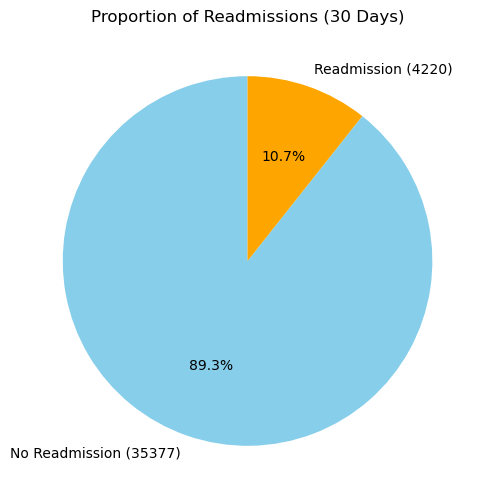

In [109]:
import matplotlib.pyplot as plt

# Calculate readmission counts for 30 days
readmission_counts = notes_diagnosis_adm_df['Readmission'].value_counts()
readmission_30_days = readmission_counts[1]  # Assuming 1 indicates readmission
no_readmission = readmission_counts[0]      # Assuming 0 indicates no readmission

# Display the counts
print(f"Readmission Count (within 30 days): {readmission_30_days}")
print(f"No Readmission Count: {no_readmission}")

# Pie chart for readmission
plt.figure(figsize=(6, 6))
plt.pie(readmission_counts,
        labels=[f'No Readmission ({no_readmission})', f'Readmission ({readmission_30_days})'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['skyblue', 'orange'])
plt.title(f'Proportion of Readmissions (30 Days)')
plt.show()


### Dropping Unnecessary Features to reduce the redundancy

In [112]:
# Summary of data types
print("Data Types in the Dataset:")
print(notes_diagnosis_adm_df.dtypes)

# Identify continuous features
continuous_features = notes_diagnosis_adm_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("\nContinuous Features:")
print(continuous_features)

# Identify categorical features
categorical_features = notes_diagnosis_adm_df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
print("\nCategorical Features:")
print(categorical_features)


Data Types in the Dataset:
ROW_ID                                       int64
SUBJECT_ID                                   int64
HADM_ID                                    float64
CATEGORY                                    object
DESCRIPTION                                 object
TEXT                                        object
ADMITTIME                           datetime64[ns]
DISCHTIME                           datetime64[ns]
ADMISSION_TYPE                              object
LEN_OF_STAY                                  int64
Previous_DISCHTIME                          object
Readmission                                  int32
GENDER                                      object
DOB                                 datetime64[ns]
DOD                                         object
EXPIRE_FLAG                                  int64
AGE                                          int32
ICD9_CODE                                   object
PROC_ICD9_CODE                              object
DRG_

#### Removing Past_6_Months_ED_Admission as its is a subset of Past_6_Months_Hospital_Admission to reduce redundancy

In [115]:
# Check if Past_6_Months_ED_Admission is a subset of Past_6_Months_Hospital_Admission
is_subset = (notes_diagnosis_adm_df['Past_6_Months_ED_Admission'] <= notes_diagnosis_adm_df['Past_6_Months_Hospital_Admission']).all()

# Output the result
if is_subset:
    print("Past_6_Months_ED_Admission is a subset of Past_6_Months_Hospital_Admission.")
else:
    print("Past_6_Months_ED_Admission is NOT a subset of Past_6_Months_Hospital_Admission.")


Past_6_Months_ED_Admission is a subset of Past_6_Months_Hospital_Admission.


In [117]:
# Compute correlation
correlation = notes_diagnosis_adm_df[['Past_6_Months_Hospital_Admission', 'Past_6_Months_ED_Admission']].corr()

# Display correlation matrix
print("Correlation matrix:")
print(correlation)

Correlation matrix:
                                  Past_6_Months_Hospital_Admission  \
Past_6_Months_Hospital_Admission                          1.000000   
Past_6_Months_ED_Admission                                0.974155   

                                  Past_6_Months_ED_Admission  
Past_6_Months_Hospital_Admission                    0.974155  
Past_6_Months_ED_Admission                          1.000000  


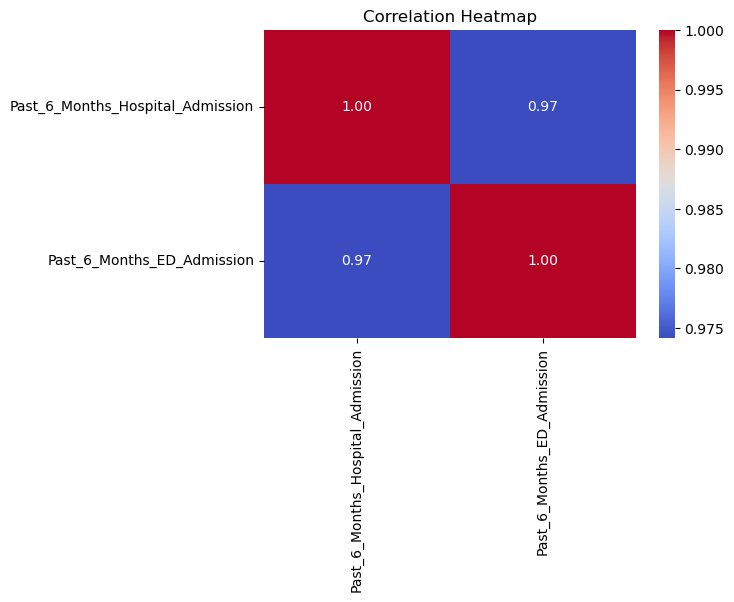

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


#### Removing Previous_DISCHTIME as it is a date and we are not using for any visualizations

In [122]:
# Display the first few rows of the Previous_DISCHTIME column
print(notes_diagnosis_adm_df['Previous_DISCHTIME'].head(20))


0                       0
1                       0
2                       0
3                       0
4                       0
5                       0
6                       0
7                       0
8                       0
9                       0
10                      0
11    2134-09-24 16:15:00
12    2153-09-08 19:10:00
13                      0
14                      0
15                      0
16                      0
17    2186-07-20 16:00:00
18    2131-05-08 14:00:00
19                      0
Name: Previous_DISCHTIME, dtype: object


#### Removing Text as we are using cleaned_text as input for the model
#### Removing CPT_CD and DESCRIPTION as it is not appropriate feature  for our objective
#### Removing sentiment_scores as we are using patients_feedback

In [125]:
# Dropping the specified columns
columns_to_drop = [
    'Past_6_Months_ED_Admission',
    'CPT_CD',
    'sentiment_scores',
    'TEXT',
    'DOD',
    'Previous_DISCHTIME',
    'DESCRIPTION'
]

notes_diagnosis_adm_df = notes_diagnosis_adm_df.drop(columns=columns_to_drop, axis=1)


In [127]:
notes_diagnosis_adm_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CATEGORY,ADMITTIME,DISCHTIME,ADMISSION_TYPE,LEN_OF_STAY,Readmission,GENDER,...,AGE,ICD9_CODE,PROC_ICD9_CODE,DRG_CODE,Past_6_Months_Hospital_Admission,ICU_LOS,cleaned_text,patient_feedback,compound,patients_sentiment
0,44005,3,145834.0,Discharge summary,2101-10-20 19:08:00,2101-10-31 13:58:00,EMERGENCY,10,0,M,...,76,"[0389, 78559, 5849, 4275, 41071, 4280, 6826, 4...","[9604, 9962, 8964, 9672, 3893, 966]",[416],0,6,admission date discharge date date birth sex s...,patient complained,-0.4019,negative
1,4788,4,185777.0,Discharge summary,2191-03-16 00:28:00,2191-03-23 18:41:00,EMERGENCY,7,0,F,...,47,"[042, 1363, 7994, 2763, 7907, 5715, 04111, V09...","[3893, 8872, 3323]",[489],0,1,admission date discharge date date birth sex f...,None,0.0000,neutral
2,20070,9,150750.0,Discharge summary,2149-11-09 13:06:00,2149-11-14 10:15:00,EMERGENCY,4,0,M,...,41,"[431, 5070, 4280, 5849, 2765, 4019]","[9672, 9604]",[14],0,5,admission date discharge date date birth sex s...,None,0.0000,neutral
3,57115,9,150750.0,Discharge summary,2149-11-09 13:06:00,2149-11-14 10:15:00,EMERGENCY,4,0,M,...,41,"[431, 5070, 4280, 5849, 2765, 4019]","[9672, 9604]",[14],0,5,name unit admission date discharge date date b...,None,0.0000,neutral
4,30120,11,194540.0,Discharge summary,2178-04-16 06:18:00,2178-05-11 19:00:00,EMERGENCY,25,0,F,...,50,[1913],"[159, 113, 113, 9229, 9925]","[211, 2]",0,1,admission date discharge date date birth sex f...,None,0.0000,neutral


In [129]:
# Summary of data types
print("Data Types in the Dataset:")
print(notes_diagnosis_adm_df.dtypes)

# Identify continuous features
continuous_features = notes_diagnosis_adm_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("\nContinuous Features:")
print(continuous_features)

# Identify categorical features
categorical_features = notes_diagnosis_adm_df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
print("\nCategorical Features:")
print(categorical_features)


Data Types in the Dataset:
ROW_ID                                       int64
SUBJECT_ID                                   int64
HADM_ID                                    float64
CATEGORY                                    object
ADMITTIME                           datetime64[ns]
DISCHTIME                           datetime64[ns]
ADMISSION_TYPE                              object
LEN_OF_STAY                                  int64
Readmission                                  int32
GENDER                                      object
DOB                                 datetime64[ns]
EXPIRE_FLAG                                  int64
AGE                                          int32
ICD9_CODE                                   object
PROC_ICD9_CODE                              object
DRG_CODE                                    object
Past_6_Months_Hospital_Admission             int64
ICU_LOS                                      int64
cleaned_text                                object
pati

### Correlation Matrix for Continuous Features

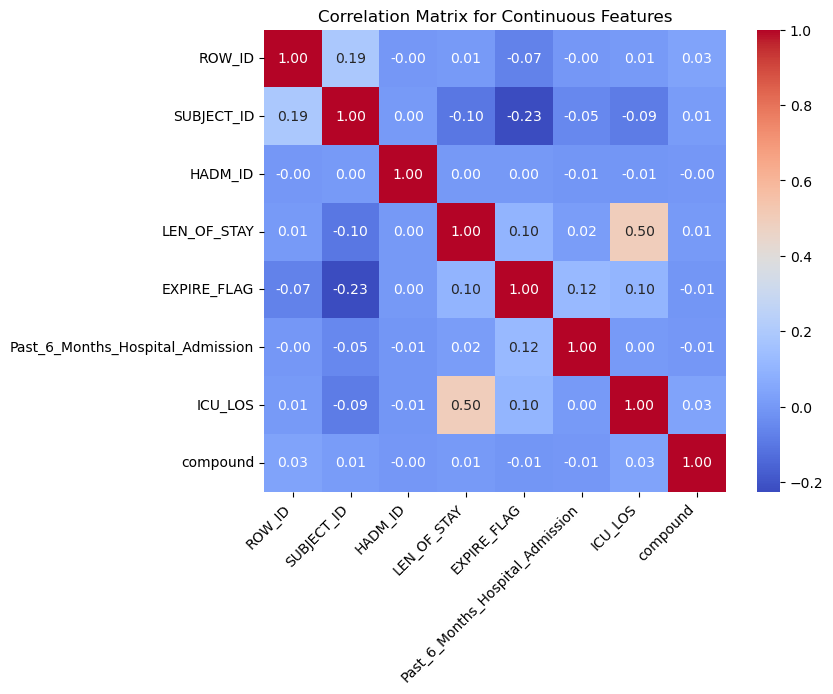

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only continuous features
correlation_data = notes_diagnosis_adm_df[continuous_features]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix for Continuous Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


### CHI-SQUARE TEST for the categorical variables with the target variable Readmission

In [135]:
# Check data types of categorical features
print(notes_diagnosis_adm_df[categorical_features].dtypes)


CATEGORY              object
ADMISSION_TYPE        object
GENDER                object
ICD9_CODE             object
PROC_ICD9_CODE        object
DRG_CODE              object
cleaned_text          object
patient_feedback      object
patients_sentiment    object
dtype: object


In [137]:
# Convert all categorical features to string
for feature in categorical_features:
    notes_diagnosis_adm_df[feature] = notes_diagnosis_adm_df[feature].astype(str)


In [139]:
from scipy.stats import chi2_contingency

# Function to perform chi-square test
def chi_square_test(data, target, features):
    results = {}
    for feature in features:
        if feature != target:  # Exclude target itself
            contingency_table = pd.crosstab(data[feature], data[target])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            results[feature] = {'Chi2': chi2, 'p-value': p}
    return pd.DataFrame(results).T

# Perform chi-square test
target_variable = 'Readmission'  # Replace with your target variable
chi_square_results = chi_square_test(notes_diagnosis_adm_df, target_variable, categorical_features)

# Display the results
chi_square_results.sort_values(by='p-value', inplace=True)
print("Chi-Square Test Results:")
print(chi_square_results)

# Filter significant results
significant_features = chi_square_results[chi_square_results['p-value'] < 0.05]
print("\nSignificant Features:")
print(significant_features)


Chi-Square Test Results:
                            Chi2        p-value
DRG_CODE             9199.898886  7.410556e-196
PROC_ICD9_CODE      28042.685583  2.426480e-194
ICD9_CODE           39597.000000  2.459819e-179
cleaned_text        39586.497538   2.131223e-41
patient_feedback     1067.985303   7.535958e-06
ADMISSION_TYPE          4.998547   2.536861e-02
patients_sentiment      3.166608   2.052957e-01
GENDER                  0.066471   7.965460e-01
CATEGORY                0.000000   1.000000e+00

Significant Features:
                          Chi2        p-value
DRG_CODE           9199.898886  7.410556e-196
PROC_ICD9_CODE    28042.685583  2.426480e-194
ICD9_CODE         39597.000000  2.459819e-179
cleaned_text      39586.497538   2.131223e-41
patient_feedback   1067.985303   7.535958e-06
ADMISSION_TYPE        4.998547   2.536861e-02


In [140]:
from tabulate import tabulate

# Display the Chi-Square Test results in tabulated format
print("Chi-Square Test Results:")
chi_square_table = tabulate(chi_square_results.reset_index(),
                            headers=["Feature", "Chi2", "p-value"],
                            tablefmt="fancy_grid",
                            showindex=False)
print(chi_square_table)

# Display the significant features in tabulated format
print("\nSignificant Features (p-value < 0.05):")
significant_features_table = tabulate(significant_features.reset_index(),
                                      headers=["Feature", "Chi2", "p-value"],
                                      tablefmt="fancy_grid",
                                      showindex=False)
print(significant_features_table)


Chi-Square Test Results:
╒════════════════════╤═══════════════╤══════════════╕
│ Feature            │          Chi2 │      p-value │
╞════════════════════╪═══════════════╪══════════════╡
│ DRG_CODE           │  9199.9       │ 7.41056e-196 │
├────────────────────┼───────────────┼──────────────┤
│ PROC_ICD9_CODE     │ 28042.7       │ 2.42648e-194 │
├────────────────────┼───────────────┼──────────────┤
│ ICD9_CODE          │ 39597         │ 2.45982e-179 │
├────────────────────┼───────────────┼──────────────┤
│ cleaned_text       │ 39586.5       │ 2.13122e-41  │
├────────────────────┼───────────────┼──────────────┤
│ patient_feedback   │  1067.99      │ 7.53596e-06  │
├────────────────────┼───────────────┼──────────────┤
│ ADMISSION_TYPE     │     4.99855   │ 0.0253686    │
├────────────────────┼───────────────┼──────────────┤
│ patients_sentiment │     3.16661   │ 0.205296     │
├────────────────────┼───────────────┼──────────────┤
│ GENDER             │     0.0664711 │ 0.796546     │
├──

In [141]:
# Step 6: Define Target Variable and Split Data
y = notes_diagnosis_adm_df['Readmission']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [142]:
import joblib

# Save the training and testing sets
joblib.dump(X_train, 'X_train.pkl')
joblib.dump(X_test, 'X_test.pkl')
joblib.dump(y_train, 'y_train.pkl')
joblib.dump(y_test, 'y_test.pkl')

print("Training and testing data saved successfully!")


Training and testing data saved successfully!


In [145]:
import joblib

# Load the training and testing sets
X_train = joblib.load('X_train.pkl')
X_test = joblib.load('X_test.pkl')
y_train = joblib.load('y_train.pkl')
y_test = joblib.load('y_test.pkl')

print("Training and testing data loaded successfully!")


Training and testing data loaded successfully!


In [148]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (31677, 19147)
y_train shape: (31677,)
X_test shape: (7920, 19147)
y_test shape: (7920,)


## **Traditional Models**

### Logistic regression

In [153]:
# Check the shapes of the resulting dataset
print("Combined feature shape:", X_combined.shape)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Train Logistic Regression Model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Model Evaluation on Training Set
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Training Classification Report:\n", classification_report(y_train, y_train_pred))

# Model Evaluation on Test Set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))


Combined feature shape: (39597, 19147)
Training set size: (31677, 19147)
Testing set size: (7920, 19147)
Training Accuracy: 0.9822584209363261
Training Confusion Matrix:
 [[28092   243]
 [  319  3023]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     28335
           1       0.93      0.90      0.91      3342

    accuracy                           0.98     31677
   macro avg       0.96      0.95      0.95     31677
weighted avg       0.98      0.98      0.98     31677

Test Accuracy: 0.9506313131313131
Test Confusion Matrix:
 [[6907  135]
 [ 256  622]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      7042
           1       0.82      0.71      0.76       878

    accuracy                           0.95      7920
   macro avg       0.89      0.84      0.87      7920
weighted avg       0.95      0.95      0.95      792

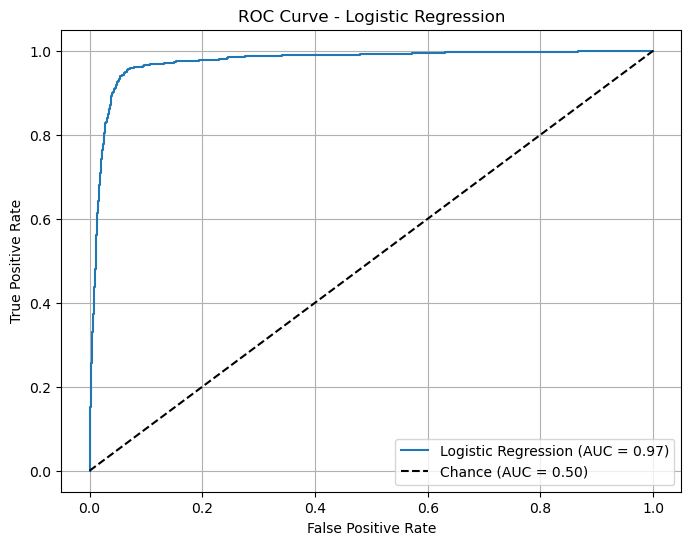

In [155]:
import joblib
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for Logistic Regression model
logistic_probs = model.predict_proba(X_test)[:, 1]
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probs)
logistic_auc = roc_auc_score(y_test, logistic_probs)

# Save the ROC curve data and AUC score
roc_data = {
    'fpr': logistic_fpr,
    'tpr': logistic_tpr,
    'auc': logistic_auc
}
joblib.dump(roc_data, 'logistic_roc_data.pkl')

# Plot and save the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(logistic_fpr, logistic_tpr, label=f'Logistic Regression (AUC = {logistic_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('logistic_roc_curve.png')
plt.show()

##  **Ensemble Modeling**

## Gradient Boosting Classifier

In [157]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Check the shapes of the resulting dataset
print("Combined feature shape:", X_combined.shape)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Train Gradient Boosting Model
model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

# Model Evaluation on Training Set
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Training Classification Report:\n", classification_report(y_train, y_train_pred))

# Model Evaluation on Test Set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Combined feature shape: (39597, 19147)
Training set size: (31677, 19147)
Testing set size: (7920, 19147)
Training Accuracy: 0.9582662499605392
Training Confusion Matrix:
 [[27067  1268]
 [   54  3288]]
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     28335
           1       0.72      0.98      0.83      3342

    accuracy                           0.96     31677
   macro avg       0.86      0.97      0.90     31677
weighted avg       0.97      0.96      0.96     31677

Test Accuracy: 0.9544191919191919
Test Confusion Matrix:
 [[6710  332]
 [  29  849]]
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      7042
           1       0.72      0.97      0.82       878

    accuracy                           0.95      7920
   macro avg       0.86      0.96      0.90      7920
weighted avg       0.97      0.95      0.96      792

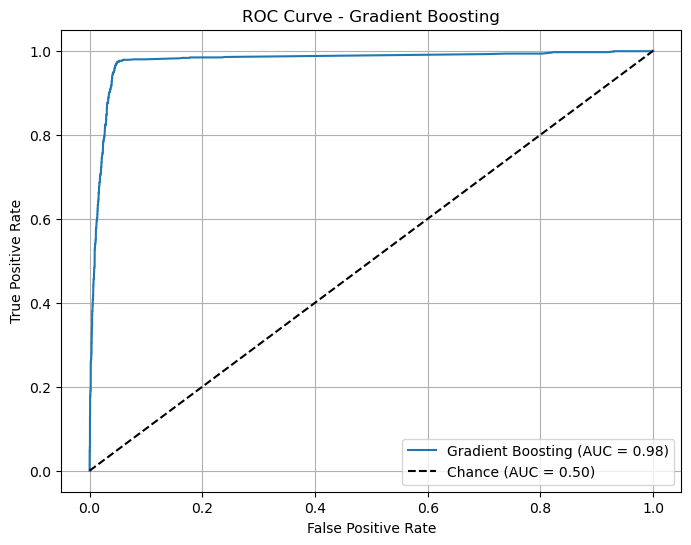

In [158]:
import joblib
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for Gradient Boosting model
gb_probs = model.predict_proba(X_test)[:, 1]
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
gb_auc = roc_auc_score(y_test, gb_probs)

# Save the ROC curve data and AUC score
roc_data_gb = {
    'fpr': gb_fpr,
    'tpr': gb_tpr,
    'auc': gb_auc
}
joblib.dump(roc_data_gb, 'gradient_boosting_roc_data.pkl')

# Plot and save the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.title('ROC Curve - Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('gradient_boosting_roc_curve.png')
plt.show()

## Extreme Gradient Boosting

In [160]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Model Evaluation on Training Set
y_train_pred = xgb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Training Classification Report:\n", classification_report(y_train, y_train_pred))

# Model Evaluation on Test Set
y_test_pred = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))


C:\Users\KOUSHIK\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:22:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.99958960760173
Training Confusion Matrix:
 [[28323    12]
 [    1  3341]]
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       1.00      1.00      1.00      3342

    accuracy                           1.00     31677
   macro avg       1.00      1.00      1.00     31677
weighted avg       1.00      1.00      1.00     31677

Test Accuracy: 0.9611111111111111
Test Confusion Matrix:
 [[6830  212]
 [  96  782]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      7042
           1       0.79      0.89      0.84       878

    accuracy                           0.96      7920
   macro avg       0.89      0.93      0.91      7920
weighted avg       0.96      0.96      0.96      7920



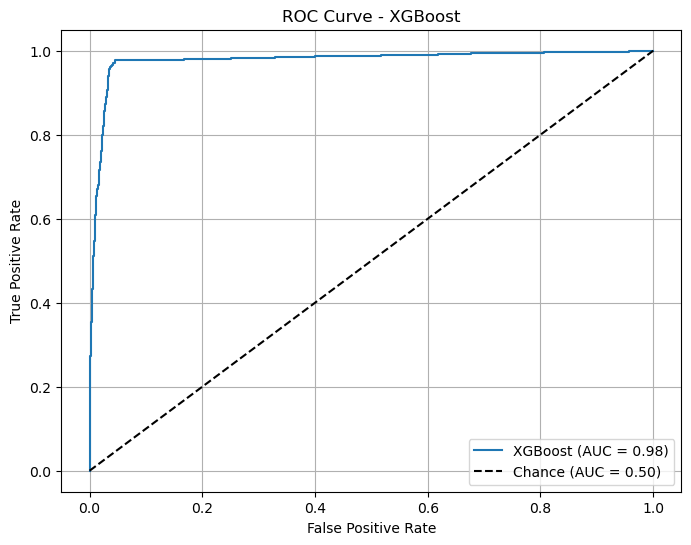

In [161]:
import joblib
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for XGBoost model
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

# Save the ROC curve data and AUC score
roc_data_xgb = {
    'fpr': xgb_fpr,
    'tpr': xgb_tpr,
    'auc': xgb_auc
}
joblib.dump(roc_data_xgb, 'xgboost_roc_data.pkl')

# Plot and save the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.title('ROC Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('xgboost_roc_curve.png')
plt.show()

# Stacking

## Stacking Logistsic and Extreme Gradient Boosting

In [162]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define base models
base_models = [
    ('logreg', LogisticRegression(random_state=42)),
    ('xgboost', XGBClassifier(random_state=42))
]

# Define meta-learner
meta_learner = LogisticRegression(random_state=42)

# Create the StackingClassifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_learner, cv=5)

# Train the stacked model
stacking_model.fit(X_train, y_train)


# Model Evaluation on Training Set
y_train_pred = stacking_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Training Classification Report:\n", classification_report(y_train, y_train_pred))

# # Evaluate the model
y_pred = stacking_model.predict(X_test)
print("Stacking Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Training Accuracy: 0.9995264703096884
Training Confusion Matrix:
 [[28335     0]
 [   15  3327]]
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       1.00      1.00      1.00      3342

    accuracy                           1.00     31677
   macro avg       1.00      1.00      1.00     31677
weighted avg       1.00      1.00      1.00     31677

Stacking Model Accuracy: 0.9603535353535354
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      7042
           1       0.83      0.80      0.82       878

    accuracy                           0.96      7920
   macro avg       0.90      0.89      0.90      7920
weighted avg       0.96      0.96      0.96      7920



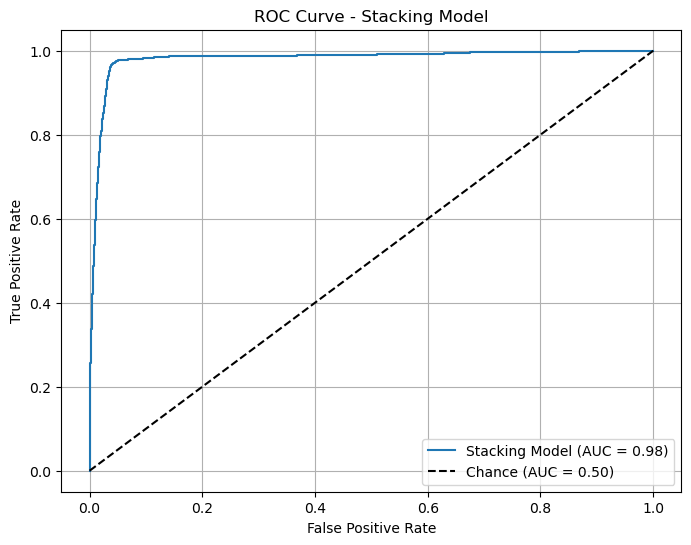

In [163]:
import joblib
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for Stacking model
stacking_probs = stacking_model.predict_proba(X_test)[:, 1]
stacking_fpr, stacking_tpr, _ = roc_curve(y_test, stacking_probs)
stacking_auc = roc_auc_score(y_test, stacking_probs)

# Save the ROC curve data and AUC score
roc_data_stacking = {
    'fpr': stacking_fpr,
    'tpr': stacking_tpr,
    'auc': stacking_auc
}
joblib.dump(roc_data_stacking, 'stacking_roc_data.pkl')

# Plot and save the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(stacking_fpr, stacking_tpr, label=f'Stacking Model (AUC = {stacking_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.title('ROC Curve - Stacking Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('stacking_roc_curve.png')
plt.show()

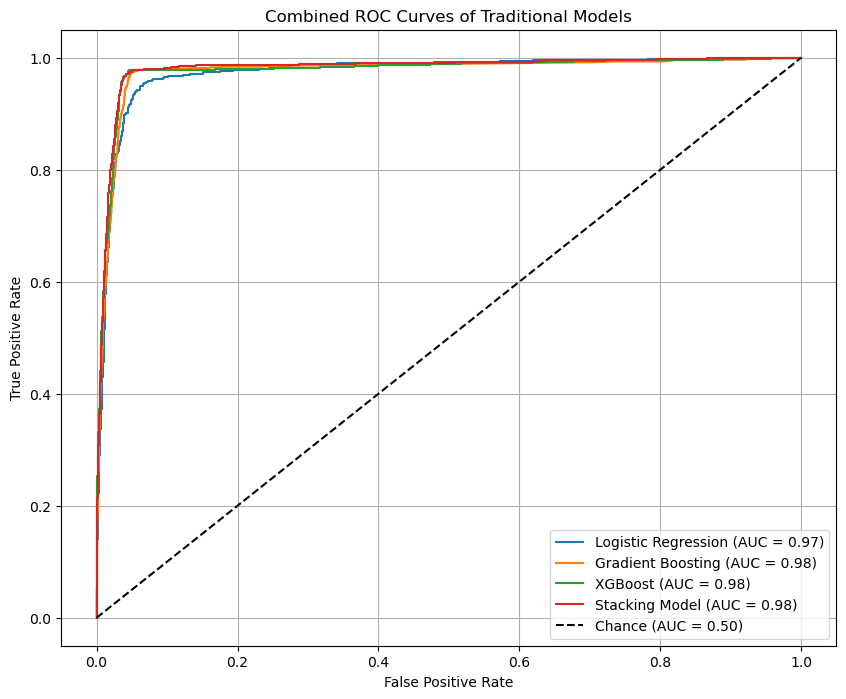

In [164]:
import joblib
import matplotlib.pyplot as plt

# Load saved ROC data for each model
logistic_roc_data = joblib.load('logistic_roc_data.pkl')
gradient_boosting_roc_data = joblib.load('gradient_boosting_roc_data.pkl')
xgboost_roc_data = joblib.load('xgboost_roc_data.pkl')
stacking_roc_data = joblib.load('stacking_roc_data.pkl')

# Plot combined ROC curves
plt.figure(figsize=(10, 8))

# Plot each model's ROC curve
plt.plot(logistic_roc_data['fpr'], logistic_roc_data['tpr'], label=f'Logistic Regression (AUC = {logistic_roc_data["auc"]:.2f})')
plt.plot(gradient_boosting_roc_data['fpr'], gradient_boosting_roc_data['tpr'], label=f'Gradient Boosting (AUC = {gradient_boosting_roc_data["auc"]:.2f})')
plt.plot(xgboost_roc_data['fpr'], xgboost_roc_data['tpr'], label=f'XGBoost (AUC = {xgboost_roc_data["auc"]:.2f})')
plt.plot(stacking_roc_data['fpr'], stacking_roc_data['tpr'], label=f'Stacking Model (AUC = {stacking_roc_data["auc"]:.2f})')

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')

# Customize the plot
plt.title('Combined ROC Curves of Traditional Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('combined_roc_curve.png')
plt.show()

# Advanced Models

## FCNN

In [165]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GRU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# Define the FCNN model
fcnn_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the FCNN model
fcnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the FCNN model
fcnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Save the FCNN model
fcnn_model.save('fcnn_model_latest.h5')
# Evaluate FCNN model on the training and test sets
y_train_pred_fcnn = (fcnn_model.predict(X_train) > 0.5).astype(int)
y_test_pred_fcnn = (fcnn_model.predict(X_test) > 0.5).astype(int)

print("FCNN Training Classification Report:\n", classification_report(y_train, y_train_pred_fcnn))
print("FCNN Testing Classification Report:\n", classification_report(y_test, y_test_pred_fcnn))


C:\Users\KOUSHIK\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - accuracy: 0.8473 - loss: 0.3789 - val_accuracy: 0.9580 - val_loss: 0.0934 - learning_rate: 0.0010
Epoch 2/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 37s 46ms/step - accuracy: 0.9608 - loss: 0.0998 - val_accuracy: 0.9588 - val_loss: 0.0979 - learning_rate: 0.0010
Epoch 3/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9747 - loss: 0.0678 - val_accuracy: 0.9599 - val_loss: 0.1005 - learning_rate: 0.0010
Epoch 4/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.9846 - loss: 0.0440 - val_accuracy: 0.9602 - val_loss: 0.1306 - learning_rate: 0.0010
Epoch 5/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9913 - loss: 0.0258 - val_accuracy: 0.9590 - val_loss: 0.1463 - learning_rate: 5.0000e-04
Epoch 6/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9946 - loss: 0.0156 - val_accuracy: 0.9588 - val_loss: 0.1634 - learning_rate: 5.0000e-04


990/990 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
FCNN Training Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98     28335
           1       0.82      0.93      0.87      3342

    accuracy                           0.97     31677
   macro avg       0.90      0.95      0.93     31677
weighted avg       0.97      0.97      0.97     31677

FCNN Testing Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      7042
           1       0.75      0.87      0.80       878

    accuracy                           0.95      7920
   macro avg       0.87      0.92      0.89      7920
weighted avg       0.96      0.95      0.95      7920



248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


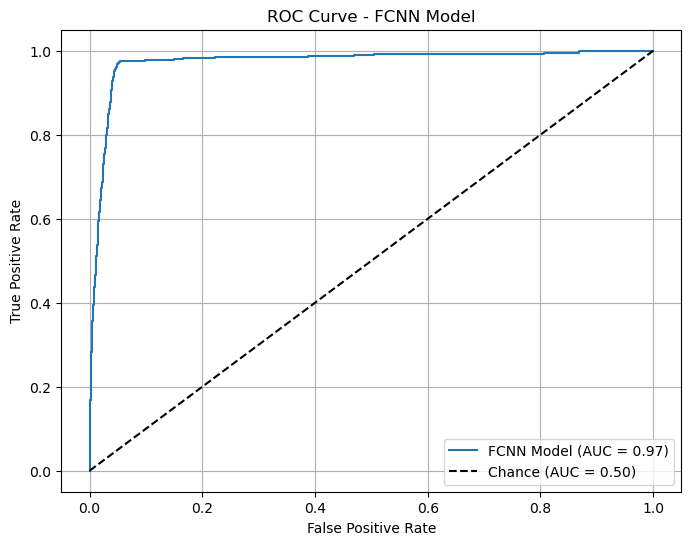

In [166]:
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC for FCNN model
fcnn_probs = fcnn_model.predict(X_test).ravel()  # Get probabilities as a flat array
fcnn_fpr, fcnn_tpr, _ = roc_curve(y_test, fcnn_probs)
fcnn_auc = roc_auc_score(y_test, fcnn_probs)

# Save the ROC curve data and AUC score
roc_data_fcnn = {
    'fpr': fcnn_fpr,
    'tpr': fcnn_tpr,
    'auc': fcnn_auc
}
joblib.dump(roc_data_fcnn, 'fcnn_roc_data.pkl')

# Plot and save the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fcnn_fpr, fcnn_tpr, label=f'FCNN Model (AUC = {fcnn_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.title('ROC Curve - FCNN Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('fcnn_roc_curve.png')
plt.show()

## Gated Recurrent Unit (GRU Model) -- Best working model

In [167]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GRU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Ensure data is in dense format (if sparse, convert to dense)
X_train_dense = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test_dense = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

# Reshape data for GRU model (treat each sample as a single timestep)
X_train_reshaped = np.expand_dims(X_train_dense, axis=1)
X_test_reshaped = np.expand_dims(X_test_dense, axis=1)

# Define the GRU model
gru_model = Sequential([
    GRU(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the GRU model
gru_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the GRU model
gru_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Save the GRU model
gru_model.save('gru_model_latest.h5')

# Evaluate GRU model on the training and test sets
y_train_pred_gru = (gru_model.predict(X_train_reshaped) > 0.5).astype(int)
y_test_pred_gru = (gru_model.predict(X_test_reshaped) > 0.5).astype(int)

print("GRU Training Classification Report:\n", classification_report(y_train, y_train_pred_gru))
print("GRU Testing Classification Report:\n", classification_report(y_test, y_test_pred_gru))


C:\Users\KOUSHIK\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
792/792 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.9223 - loss: 0.2230 - val_accuracy: 0.9563 - val_loss: 0.0925 - learning_rate: 0.0010
Epoch 2/100
792/792 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.9671 - loss: 0.0795 - val_accuracy: 0.9566 - val_loss: 0.1004 - learning_rate: 0.0010
Epoch 3/100
792/792 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.9765 - loss: 0.0566 - val_accuracy: 0.9577 - val_loss: 0.1158 - learning_rate: 0.0010
Epoch 4/100
792/792 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.9882 - loss: 0.0306 - val_accuracy: 0.9563 - val_loss: 0.1463 - learning_rate: 0.0010
Epoch 5/100
792/792 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.9939 - loss: 0.0158 - val_accuracy: 0.9572 - val_loss: 0.1672 - learning_rate: 5.0000e-04
Epoch 6/100
792/792 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.9957 - loss: 0.0121 - val_accuracy: 0.9582 - val_loss: 0.1937 - learning_rate: 5.0000e-04


990/990 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
GRU Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     28335
           1       0.76      0.97      0.85      3342

    accuracy                           0.96     31677
   macro avg       0.88      0.97      0.92     31677
weighted avg       0.97      0.96      0.97     31677

GRU Testing Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      7042
           1       0.73      0.93      0.82       878

    accuracy                           0.95      7920
   macro avg       0.86      0.94      0.90      7920
weighted avg       0.96      0.95      0.96      7920



248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


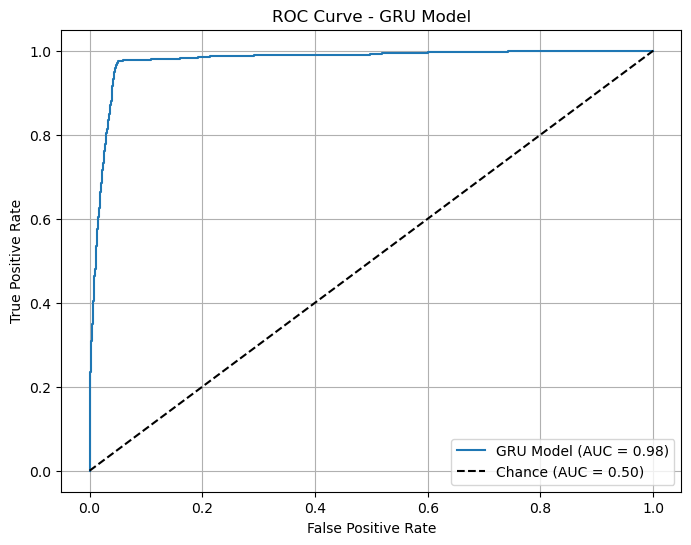

In [168]:
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC for GRU model
gru_probs = gru_model.predict(X_test_reshaped).ravel()  # Get probabilities as a flat array
gru_fpr, gru_tpr, _ = roc_curve(y_test, gru_probs)
gru_auc = roc_auc_score(y_test, gru_probs)

# Save the ROC curve data and AUC score
roc_data_gru = {
    'fpr': gru_fpr,
    'tpr': gru_tpr,
    'auc': gru_auc
}
joblib.dump(roc_data_gru, 'gru_roc_data.pkl')

# Plot and save the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(gru_fpr, gru_tpr, label=f'GRU Model (AUC = {gru_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.title('ROC Curve - GRU Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('gru_roc_curve.png')
plt.show()

## Long Short-Term Memory (LSTM) Model

In [172]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Convert sparse matrices to dense format
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Reshape data and prepare for LSTM
X_train_reshaped = X_train_dense.reshape((X_train_dense.shape[0], 1, X_train_dense.shape[1]))
X_test_reshaped = X_test_dense.reshape((X_test_dense.shape[0], 1, X_test_dense.shape[1]))
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Define the LSTM model with dropout for regularization
model = Sequential([
    Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    LSTM(32, activation='relu'),  # Reduced number of units
    Dropout(0.2),  # Dropout layer
    Dense(16, activation='relu'),
    Dropout(0.2),  # Additional Dropout layer
    Dense(y_train_categorical.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train_reshaped, y_train_categorical, epochs=50, batch_size=32,
          validation_data=(X_test_reshaped, y_test_categorical), callbacks=[early_stopping])

# Evaluate model on training set
y_train_pred_prob = model.predict(X_train_reshaped)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Training Classification Report:\n", classification_report(y_train, y_train_pred))

# Evaluate model on test set
y_test_pred_prob = model.predict(X_test_reshaped)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))


Epoch 1/50
990/990 ━━━━━━━━━━━━━━━━━━━━ 28s 26ms/step - accuracy: 0.9227 - loss: 0.2270 - val_accuracy: 0.9545 - val_loss: 0.1029
Epoch 2/50
990/990 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9636 - loss: 0.0848 - val_accuracy: 0.9562 - val_loss: 0.1098
Epoch 3/50
990/990 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9770 - loss: 0.0530 - val_accuracy: 0.9591 - val_loss: 0.1195
Epoch 4/50
990/990 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9855 - loss: 0.0337 - val_accuracy: 0.9580 - val_loss: 0.1493
Epoch 5/50
990/990 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9929 - loss: 0.0215 - val_accuracy: 0.9559 - val_loss: 0.1932
Epoch 6/50
990/990 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9955 - loss: 0.0131 - val_accuracy: 0.9577 - val_loss: 0.2122
990/990 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
Training Accuracy: 0.9618019383148657
Training Confusion Matrix:
 [[27183  1152]
 [   58  3284]]
Training Classification Report:
               precision    recall  f1-score   sup

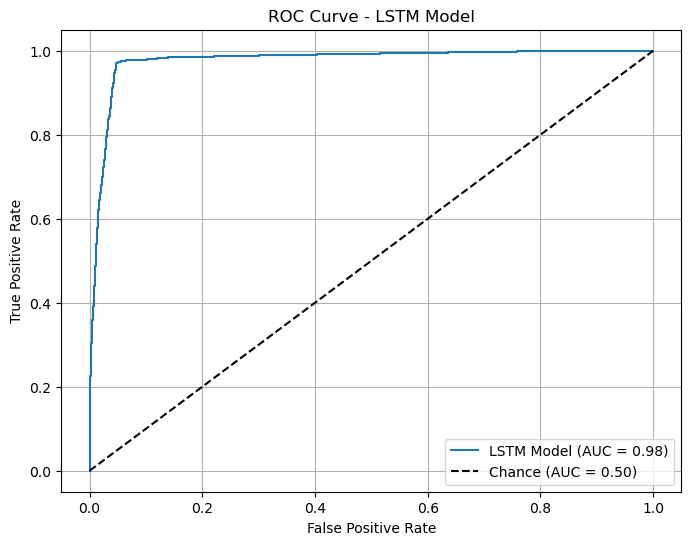

In [173]:
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC for LSTM model (binary classification assumes probabilities for class 1)
lstm_probs = y_test_pred_prob[:, 1]  # Extract probabilities for the positive class
lstm_fpr, lstm_tpr, _ = roc_curve(y_test, lstm_probs)
lstm_auc = roc_auc_score(y_test, lstm_probs)

# Save the ROC curve data and AUC score
roc_data_lstm = {
    'fpr': lstm_fpr,
    'tpr': lstm_tpr,
    'auc': lstm_auc
}
joblib.dump(roc_data_lstm, 'lstm_roc_data.pkl')

# Plot and save the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(lstm_fpr, lstm_tpr, label=f'LSTM Model (AUC = {lstm_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.title('ROC Curve - LSTM Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('lstm_roc_curve.png')
plt.show()

## Hybrid Ensemble Model: Combining Deep Neural Networks and Gradient Boosting for Enhanced Binary Classification

In [175]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import joblib

# Prepare and define the neural network model without hyperparameter tuning
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model with binary crossentropy loss
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping and Learning Rate Reduction for better training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the neural network model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Save the trained neural network model
model.save('best_deep_model.h5')

# Define the Gradient Boosting model without hyperparameter tuning
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

# Train the Gradient Boosting model
gb_model.fit(X_train, y_train)

# Save the Gradient Boosting model
joblib.dump(gb_model, 'best_gradient_boosting_model.pkl')

# Get predictions from both models
y_train_pred_prob_deep = model.predict(X_train).flatten()
y_test_pred_prob_deep = model.predict(X_test).flatten()

y_train_pred_prob_gb = gb_model.predict_proba(X_train)[:, 1]
y_test_pred_prob_gb = gb_model.predict_proba(X_test)[:, 1]

# Combine predictions from both models (average ensemble)
y_train_pred_prob_ensemble = (y_train_pred_prob_deep + y_train_pred_prob_gb) / 2
y_test_pred_prob_ensemble = (y_test_pred_prob_deep + y_test_pred_prob_gb) / 2

# Convert probabilities to class predictions
y_train_pred_ensemble = (y_train_pred_prob_ensemble > 0.5).astype(int)
y_test_pred_ensemble = (y_test_pred_prob_ensemble > 0.5).astype(int)

# Evaluate the ensemble model on the training set
print("Training Classification Report:\n", classification_report(y_train, y_train_pred_ensemble))

# Evaluate the ensemble model on the test set
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred_ensemble))


C:\Users\KOUSHIK\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - accuracy: 0.8550 - loss: 0.3704 - val_accuracy: 0.9588 - val_loss: 0.1064 - learning_rate: 0.0010
Epoch 2/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.9608 - loss: 0.1040 - val_accuracy: 0.9615 - val_loss: 0.0901 - learning_rate: 0.0010
Epoch 3/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - accuracy: 0.9729 - loss: 0.0705 - val_accuracy: 0.9531 - val_loss: 0.1072 - learning_rate: 0.0010
Epoch 4/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 37s 46ms/step - accuracy: 0.9829 - loss: 0.0478 - val_accuracy: 0.9609 - val_loss: 0.1134 - learning_rate: 0.0010
Epoch 5/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.9893 - loss: 0.0339 - val_accuracy: 0.9598 - val_loss: 0.1359 - learning_rate: 0.0010
Epoch 6/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.9919 - loss: 0.0241 - val_accuracy: 0.9615 - val_loss: 0.1533 - learning_rate: 5.0000e-04
Epoch 7/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.9971

990/990 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     28335
           1       0.84      0.98      0.90      3342

    accuracy                           0.98     31677
   macro avg       0.92      0.98      0.95     31677
weighted avg       0.98      0.98      0.98     31677

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      7042
           1       0.75      0.94      0.84       878

    accuracy                           0.96      7920
   macro avg       0.87      0.95      0.91      7920
weighted avg       0.97      0.96      0.96      7920



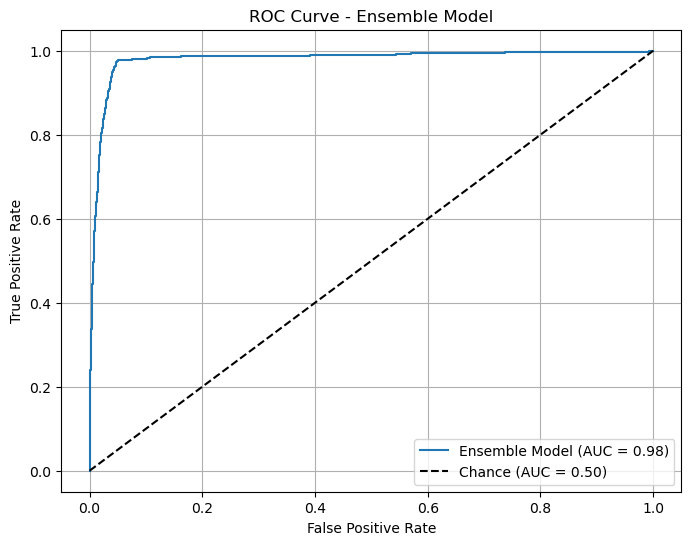

In [176]:
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC for the ensemble model
ensemble_fpr, ensemble_tpr, _ = roc_curve(y_test, y_test_pred_prob_ensemble)
ensemble_auc = roc_auc_score(y_test, y_test_pred_prob_ensemble)

# Save the ROC curve data and AUC score
roc_data_ensemble = {
    'fpr': ensemble_fpr,
    'tpr': ensemble_tpr,
    'auc': ensemble_auc
}
joblib.dump(roc_data_ensemble, 'ensemble_roc_data.pkl')

# Plot and save the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(ensemble_fpr, ensemble_tpr, label=f'Ensemble Model (AUC = {ensemble_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.title('ROC Curve - Ensemble Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('ensemble_roc_curve.png')
plt.show()

## Hybrid Ensemble Model: Combining Deep Neural Networks and Extreme Gradient Boosting for Enhanced Binary Classification

In [178]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import xgboost as xgb
import joblib

# Define the deep learning model (without hyperparameter tuning)
def build_deep_learning_model():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize and train the deep learning model
deep_model = build_deep_learning_model()

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the deep learning model
deep_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Save the trained deep learning model
deep_model.save('deep_model_hybrid_xgboost.h5')

# Train the XGBoost model (without hyperparameter tuning)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Save the trained XGBoost model
joblib.dump(xgb_model, 'xgb_model_hybrid_xgboost.pkl')

# Get predictions from the deep learning model
y_train_pred_prob_deep = deep_model.predict(X_train).flatten()
y_test_pred_prob_deep = deep_model.predict(X_test).flatten()

# Get predictions from the XGBoost model
y_train_pred_prob_xgb = xgb_model.predict_proba(X_train)[:, 1]
y_test_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Average ensemble of predictions (default threshold at 0.5)
y_train_pred_prob_ensemble = (y_train_pred_prob_deep + y_train_pred_prob_xgb) / 2
y_test_pred_prob_ensemble = (y_test_pred_prob_deep + y_test_pred_prob_xgb) / 2

# Convert probabilities to class predictions (default threshold at 0.5)
y_train_pred_ensemble = (y_train_pred_prob_ensemble > 0.5).astype(int)
y_test_pred_ensemble = (y_test_pred_prob_ensemble > 0.5).astype(int)

# Evaluate the ensemble model on the training set
print("Hybrid with XGboost Training Classification Report:\n", classification_report(y_train, y_train_pred_ensemble))

# Evaluate the ensemble model on the test set
print("Hybrid with XGboost Testing Classification Report:\n", classification_report(y_test, y_test_pred_ensemble))


C:\Users\KOUSHIK\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.8523 - loss: 0.3717 - val_accuracy: 0.9579 - val_loss: 0.0955 - learning_rate: 0.0010
Epoch 2/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.9553 - loss: 0.1134 - val_accuracy: 0.9616 - val_loss: 0.0920 - learning_rate: 0.0010
Epoch 3/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.9738 - loss: 0.0702 - val_accuracy: 0.9596 - val_loss: 0.1064 - learning_rate: 0.0010
Epoch 4/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.9831 - loss: 0.0482 - val_accuracy: 0.9610 - val_loss: 0.1163 - learning_rate: 0.0010
Epoch 5/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.9896 - loss: 0.0307 - val_accuracy: 0.9588 - val_loss: 0.1592 - learning_rate: 0.0010
Epoch 6/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.9933 - loss: 0.0209 - val_accuracy: 0.9568 - val_loss: 0.1495 - learning_rate: 5.0000e-04
Epoch 7/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.9968

C:\Users\KOUSHIK\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:15:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


990/990 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Hybrid with XGboost Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.98      0.99      0.98      3342

    accuracy                           1.00     31677
   macro avg       0.99      0.99      0.99     31677
weighted avg       1.00      1.00      1.00     31677

Hybrid with XGboost Testing Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      7042
           1       0.78      0.91      0.84       878

    accuracy                           0.96      7920
   macro avg       0.88      0.94      0.91      7920
weighted avg       0.97      0.96      0.96      7920



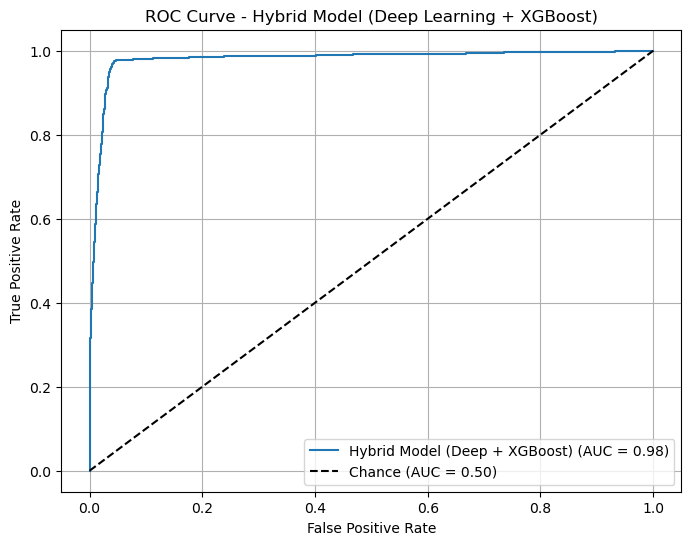

In [179]:
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC for the hybrid (Deep Learning + XGBoost) model
hybrid_fpr, hybrid_tpr, _ = roc_curve(y_test, y_test_pred_prob_ensemble)
hybrid_auc = roc_auc_score(y_test, y_test_pred_prob_ensemble)

# Save the ROC curve data and AUC score
roc_data_hybrid = {
    'fpr': hybrid_fpr,
    'tpr': hybrid_tpr,
    'auc': hybrid_auc
}
joblib.dump(roc_data_hybrid, 'hybrid_xgboost_roc_data.pkl')

# Plot and save the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(hybrid_fpr, hybrid_tpr, label=f'Hybrid Model (Deep + XGBoost) (AUC = {hybrid_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.title('ROC Curve - Hybrid Model (Deep Learning + XGBoost)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('hybrid_xgboost_roc_curve.png')
plt.show()

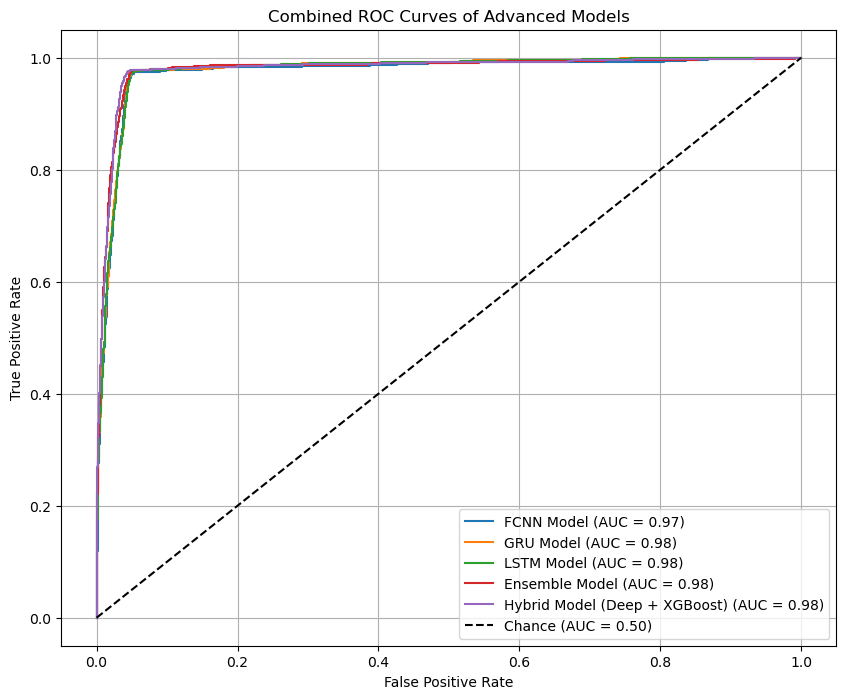

In [180]:
import joblib
import matplotlib.pyplot as plt

# Load saved ROC data for each advanced model
fcnn_roc_data = joblib.load('fcnn_roc_data.pkl')
gru_roc_data = joblib.load('gru_roc_data.pkl')
lstm_roc_data = joblib.load('lstm_roc_data.pkl')
ensemble_roc_data = joblib.load('ensemble_roc_data.pkl')
hybrid_roc_data = joblib.load('hybrid_xgboost_roc_data.pkl')

# Plot combined ROC curves
plt.figure(figsize=(10, 8))

# Plot each model's ROC curve
plt.plot(fcnn_roc_data['fpr'], fcnn_roc_data['tpr'], label=f'FCNN Model (AUC = {fcnn_roc_data["auc"]:.2f})')
plt.plot(gru_roc_data['fpr'], gru_roc_data['tpr'], label=f'GRU Model (AUC = {gru_roc_data["auc"]:.2f})')
plt.plot(lstm_roc_data['fpr'], lstm_roc_data['tpr'], label=f'LSTM Model (AUC = {lstm_roc_data["auc"]:.2f})')
plt.plot(ensemble_roc_data['fpr'], ensemble_roc_data['tpr'], label=f'Ensemble Model (AUC = {ensemble_roc_data["auc"]:.2f})')
plt.plot(hybrid_roc_data['fpr'], hybrid_roc_data['tpr'], label=f'Hybrid Model (Deep + XGBoost) (AUC = {hybrid_roc_data["auc"]:.2f})')

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')

# Customize the plot
plt.title('Combined ROC Curves of Advanced Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('combined_roc_curve_advanced_models.png')
plt.show()